                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                           

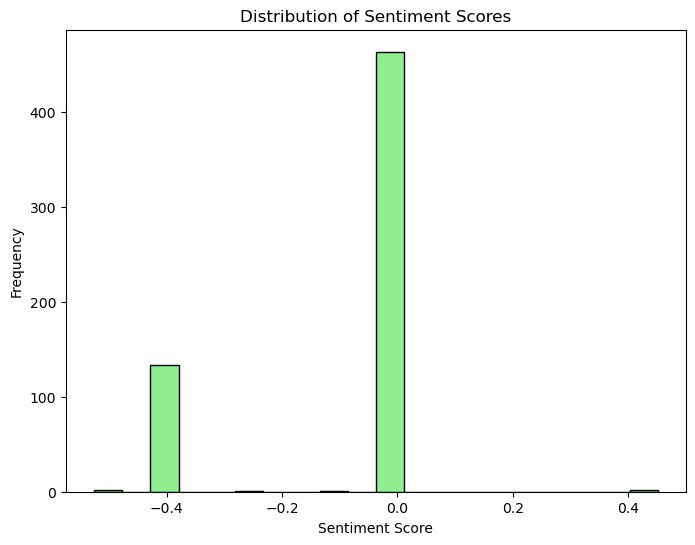

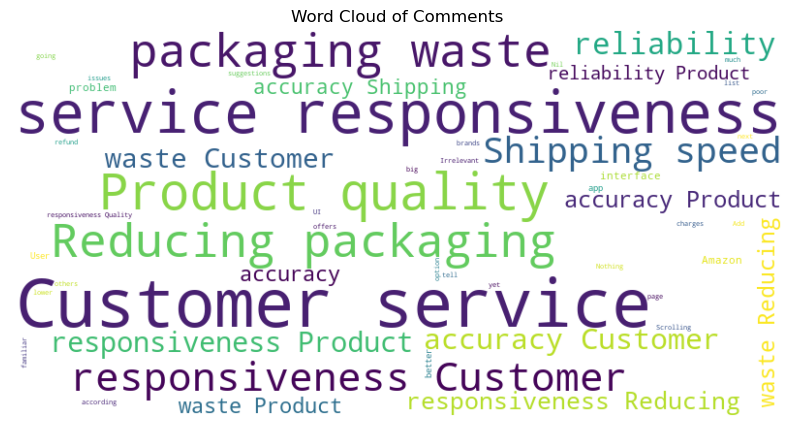

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Load the csv dataset
df = pd.read_csv("Amazon Customer Behavior Survey 2.csv")

# Display the first few rows of the dataset to check the column names
print(df.head())

# Display the column names
print(df.columns)

# Summary statistics of the dataset
print(df.describe())

# Assuming the actual column name containing comments is not 'Comment',
# replace 'Comment' with the correct column name as observed from the output above.
# For example, if the actual column name is 'Review_Comment', use that instead.

correct_column_name = 'Improvement_Areas'  # Replace with the correct column name

# Check if the correct column exists
if correct_column_name not in df.columns:
    print(f"Column {correct_column_name} not found in the dataset.")
else:
    # Sentiment analysis for the dataset
    sid = SentimentIntensityAnalyzer()
    df['Sentiment'] = df[correct_column_name].apply(lambda x: sid.polarity_scores(x)['compound'] if pd.notnull(x) else 0)

    # Distribution of sentiment scores
    plt.figure(figsize=(8, 6))
    df['Sentiment'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
    plt.title('Distribution of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    # Save the histogram
    plt.savefig('sentiment_distribution1.png', bbox_inches='tight')
    plt.show()

    # Word cloud of the comments column
    comment_text = ' '.join(df[correct_column_name].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word Cloud of Comments')
    plt.axis('off')
    # Save the word cloud
    plt.savefig('word_cloud1.png', bbox_inches='tight')
    plt.show()